# Import modules

In [8]:
! pip install xlrd
https://minimaxir.com/2019/09/howto-gpt2/
https://colab.research.google.com/drive/1RugXCYDcMvSACYNt9j0kB6zzqRKzAbBn
    https://stackabuse.com/text-summarization-with-nltk-in-python/
    #scrollTo=KBkpRgBCBS2_

In [15]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import scipy
from scipy import stats
import scipy.fftpack
import re
import glob
import copy
import os
import matplotlib.pyplot as plt
import xlrd
#! pip install xlrd


# Load master dataset and seperate all entries after 2977 containting New York

In [16]:
df1 = pd.read_excel(r"C:\Users\PARITOSHCHANDRASHEKH\Desktop\ToughLeaf\SDVOB_Listing_01_15_2022.xlsx")

# Explore Dataset

In [17]:
df1.head()


,ControlNumber,Classification,Categories,Specific Function,NAICS Code(s),Key Words,Business Size,Counties Served,Business Name,NYS Vendor ID Number,...,City,State,Zip,County Located,Home Region,Primary SDV Name,Contact Email Address,Phone Number,Business Webpage,NYS Centralized Contract Titles
0,141001,Construction Professional Services,"Architectural, Engineering & Surveying -- Envi...",Civil Engineering - Design and Construction,541310 -- 541330 -- 541340 -- 541370 -- 541620...,"Engineer, Engineering, Architect, Architecture...","$1,000,000 - $4,999,999",statewide,"Tolman Engineering, Architecture, & Surveying,...",1100124550,...,Jamestown,New York,14701,Chautauqua,Western New York,"Tolman , Rex",rtolman@patriot-dc.com,(716) 484-1366,www.patriot-dc.com,NaN
1,141005,Consulting & Other Services,Financial,"Investment Banking, Broker Dealer",523110 -- 523120 -- 523920 -- 523930 -- 921130,"Investments, Financial Advisor, Broker Dealer,...","Over $5,000,000",statewide,"Mischler Financial Group, Inc.",1100137859,...,Corona Del Mar,California,92625,Out-Of-State,Out-Of-State,"Chamberlain , Dean",dholmes@mischlerfinancial.com,(949) 720-0640,mischlerfinancial.com,NaN
2,141009,Construction,Construction Vertical: Building Construction; ...,"Roofing, Exterior, and Interior",238120 -- 238160 -- 238170 -- 238190 -- 238390...,"Roofing, Masonry, Waterproofing, Concrete, Bui...","$500,000 - $999,999",Bronx -- Kings -- Nassau -- Queens -- Richmond...,"Graham Restoration Co, Inc.",1100134852,...,Maspeth,New York,11378,Queens,New York City,"Graham , Joseph",grahamrest365@aol.com,(917) 642-3427,grcny.com,NaN
3,141010,Consulting & Other Services,Administrative & Technical -- Information Tech...,Integrated Support Solutions,488111 -- 541511 -- 541512 -- 541614 -- 541690,"Logistics, Consulting, Engineering Services, M...","$100,000 - $499,999",statewide,"Navaid Technical Services, LLC",1100137310,...,Odessa,Florida,33556,Out-Of-State,Out-Of-State,"LaMacchia , Joseph",jlamacchia@navaidtech.com; joseph.lamacchia@ve...,(315) 283-5151,navaidtech.com,NaN
4,141012,Construction,Construction Vertical: Building Construction; ...,General Contractor,236118 -- 236210 -- 236220 -- 238130 -- 238350...,"General Contractor, Rough Carpentry, Finish Ca...","$1,000,000 - $4,999,999",Bronx -- Dutchess -- New York -- Orange -- Roc...,Nordstrom Contracting & Consulting Corp.,1100113070,...,Pomona,New York,10970,Rockland,Mid-Hudson,"Nordstrom , Oscar",michael@nordstromcontracting.com,(914) 269-4343,nordstromcontracting.com,Administrative Services (Statewide)


In [18]:
df1.columns

Index(['ControlNumber', 'Classification', 'Categories', 'Specific Function',
       'NAICS Code(s)', 'Key Words', 'Business Size', 'Counties Served',
       'Business Name', 'NYS Vendor ID Number', 'Street', 'City', 'State',
       'Zip', 'County Located', 'Home Region', 'Primary SDV Name',
       'Contact Email Address', 'Phone Number', 'Business Webpage',
       'NYS Centralized Contract Titles'],
      dtype='object')

## Determine columns of interest

# Find out number of industry features

In [8]:
from collections import Counter

all_services_freq = pd.DataFrame.from_dict(Counter(df1['Industry']), orient='index').reset_index()


all_services_freq = all_services_freq.rename(columns = {'index': 'Industry Focus',0:'Frequency'})

all_services_freq = all_services_freq.dropna(axis=0)
all_services_freq

,Industry Focus,Frequency
0,Services Consultants,5982
1,Construction Consultants,1256
2,Construction,2174
3,Commodities,938


# Create Sub Datasets for each industry

In [96]:

df_servicesconsult = df1[df1['Industry']=='Services Consultants']
df_constructionconsult =  df1[df1['Industry']=='Construction Consultants']
df_construction =  df1[df1['Industry']=='Construction']
df_commodities =  df1[df1['Industry']=='Commodities']

# Load data to train

In [57]:
commodity_list_train = list(df_servicesconsult['Commodity Codes'])
capablity_list_train = list(df_servicesconsult['Capability'])

In [58]:
commoditytest_split_words = [] 
for i in commodity_list_train:
    i = str(i)
    i = re.sub(r"(^|\W)\d+", " ", i)
    i = re.sub(r"-", " ", i)
    commoditytest_split_words.append(i)
capablitytest_split_words = [] 
for i in capablity_list_train:
    i = str(i)
    i = re.sub(r"(^|\W)\d+", " ", i)
    i = re.sub(r"-", " ", i)
    capablitytest_split_words.append(i)

In [59]:
a = (capablitytest_split_words[0]).split()
b = (commoditytest_split_words[0]).split()

In [60]:
d = {'Capability' : capablitytest_split_words, 'Commodity' : commoditytest_split_words}
df = pd.DataFrame(d)

In [71]:
df

,Capability,Commodity
0,BUILDING MAINTENANCE; CARPET CLEANING; CLEANIN...,Services to Buildings and Dwellings; Ja...
1,Our Services include Office Cleaning Carpet cl...,"Janitorial services; Carpet Cleaning, D..."
2,Assist/teach startup and emerging entrepreneur...,Administrative Management and General Mana...
3,Assist/teach startup and emerging entrepreneur...,Administrative Management and General Mana...
4,Urban Public Relations and Marketing,Marketing consulting services; Public r...
...,...,...
5977,Data Management Services; ; Zibiz’s competitiv...,"Storage devices, computer, manufacturing; ..."
5978,Provide new and refurbished information techno...,Computer and Computer Peripheral Equipment...
5979,"Landscaping and Janitorial Services, Labor Sup...","Shrub services (e.g., bracing, planting, p..."
5980,Engineering consulting services : Civil engine...,Engineering consulting services; Engine...


# Check if cleaned data could be merged

In [61]:
len(commoditytest_split_words) == len(capablitytest_split_words)

True

In [62]:
commoditytest_split_words[0]+" " + capablitytest_split_words[0]

"    Services to Buildings and Dwellings;    Janitorial services;    Carpet and Upholstery Cleaning Services;    Reupholstery and Furniture Repair;    BUILDING MAINTENANCE, INSTALLATION AND REPAIR SERVICES;    Air Duct Cleaning Services;    Carpet Cleaning, Dyeing, Installation and Repair Services;    Flooring Maintenance and Repair, Including Refinishing and Sealing Services;    Janitorial and Custodial Services;    Window Washing Services;    Upholstery and Drapery Maintenance and Repair, Including Cleaning BUILDING MAINTENANCE; CARPET CLEANING; CLEANING SERVICES; DUCT WORK CLEANING; FLOOR WAXING; JANITORIAL SERVICES; UPHOLSTERY CLEANING(ON CUSTOMERS' PREMISES); WINDOW WASHING"

In [63]:
test_string = str(commoditytest_split_words[0]+" " + capablitytest_split_words[0])

In [64]:
test_string.lower()

"    services to buildings and dwellings;    janitorial services;    carpet and upholstery cleaning services;    reupholstery and furniture repair;    building maintenance, installation and repair services;    air duct cleaning services;    carpet cleaning, dyeing, installation and repair services;    flooring maintenance and repair, including refinishing and sealing services;    janitorial and custodial services;    window washing services;    upholstery and drapery maintenance and repair, including cleaning building maintenance; carpet cleaning; cleaning services; duct work cleaning; floor waxing; janitorial services; upholstery cleaning(on customers' premises); window washing"

# Combine precusor data

In [9]:


def remove_punc(String):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for ele in String:
        if ele in punc:
            String = String.replace(ele, "")
    return String
data = []
for num in range(len(commoditytest_split_words)):
                 all_tags_master = str(commoditytest_split_words[num]+" " + capablitytest_split_words[num])
                 #all_tags_master = remove_punc(all_tags_master.lower())
                 data.append(all_tags_master)
data

NameError: name 'commoditytest_split_words' is not defined

# Find tags

In [67]:

from collections import Counter

counts = Counter()

for sentence in data:
    counts.update(word.strip('.,?!"\'').lower() for word in sentence.split())

In [70]:
def split(txt, seps):
    default_sep = seps[0]

    # we skip seps[0] because that's the default separator
    for sep in seps[1:]:
        txt = txt.replace(sep, default_sep)
    return [i.strip() for i in txt.split(default_sep)]

In [174]:
gram_list =[]
gram_list2 = []
for i in range(len(data)):
               split_list_data = split(data[i],(',', ';'))
               gram_list2.append(split_list_data)


In [194]:
for i in range(len(gram_list2)):
    for j in range(len(gram_list2[i])):
        gram_list2[i][j] = gram_list2[i][j].lower()

In [212]:
new_count_final = []
for i in range(len(gram_list2)):
    #string_new = ''.join(gram_list[i])
    new_count_new = Counter()
    new_count_new.update(gram_list2[i])
    new_count_final.append(new_count_new)
new_count_final[1]

Counter({'janitorial services': 2,
         'carpet cleaning': 2,
         'dyeing': 1,
         'installation and repair services': 1,
         'janitorial and custodial services our services include office cleaning carpet cleaning': 1,
         'floor stripping and waxing and general building maintenance.': 1,
         '': 1,
         'building maintenance': 1,
         'cleaning services': 1})

In [187]:

new_count = Counter()
for i in range(len(gram_list2)):
    #string_new = ''.join(gram_list[i])
    new_count.update(word.strip('.?!\'').lower() for word in gram_list2[i])
new_count

Counter({'services to buildings and dwellings': 1,
         'janitorial services': 164,
         'carpet and upholstery cleaning services': 12,
         'reupholstery and furniture repair': 3,
         'building maintenance': 6,
         'installation and repair services': 17,
         'air duct cleaning services': 2,
         'carpet cleaning': 34,
         'dyeing': 16,
         'flooring maintenance and repair': 6,
         'including refinishing and sealing services': 6,
         'janitorial and custodial services': 47,
         'window washing services': 7,
         'upholstery and drapery maintenance and repair': 1,
         'including cleaning building maintenance': 1,
         'cleaning services': 34,
         'duct work cleaning': 2,
         'floor waxing': 6,
         "upholstery cleaning(on customers' premises)": 2,
         'window washing': 10,
         'janitorial and custodial services our services include office cleaning carpet cleaning': 1,
         'floor stripping a

In [156]:
new_count = Counter()
for i in range(len(gram_list2)):
    #string_new = ''.join(gram_list[i])
    new_count.update(word.strip('.?!\'').lower() for word in gram_list2[i])
new_count

Counter({'services to buildings and dwellings': 1,
         'janitorial services': 164,
         'carpet and upholstery cleaning services': 12,
         'reupholstery and furniture repair': 3,
         'building maintenance': 6,
         'installation and repair services': 17,
         'air duct cleaning services': 2,
         'carpet cleaning': 35,
         'dyeing': 16,
         'flooring maintenance and repair': 6,
         'including refinishing and sealing services': 6,
         'janitorial and custodial services': 47,
         'window washing services': 7,
         'upholstery and drapery maintenance and repair': 1,
         'including cleaning building maintenance': 1,
         'cleaning services': 34,
         'duct work cleaning': 2,
         'floor waxing': 6,
         "upholstery cleaning(on customers' premises)": 2,
         'window washing': 10,
         'janitorial and custodial services our services include office cleaning carpet cleaning': 1,
         'floor stripping a

In [189]:


all_services_HOTWORDS = pd.DataFrame.from_dict(new_count, orient='index').reset_index()


all_services_HOTWORDS = all_services_HOTWORDS.rename(columns = {'index': 'Words',0:'Frequency'})

all_services_freq = all_services_freq.dropna(how="all",axis =0)
all_services_HOTWORDS1 = all_services_HOTWORDS.sort_values(by='Frequency', ascending=False)

In [220]:
frequenceydata = []
for i in range(len(new_count_final)):
    
    all_services_HOTWORDS_new = pd.DataFrame.from_dict(new_count_final[i],orient = 'Index').reset_index()
    frequenceydata.append(all_services_HOTWORDS_new)


In [222]:
finaldf = pd.concat(frequenceydata)

In [228]:
Hotwords_data = finaldf.rename(columns = {'index': 'Words',0:'Frequency'})
nan_value = float("NaN")
#Convert NaN values to empty string
#all_services_HOTWORDS1
Hotwords_data.replace("", nan_value, inplace=True)
#all_services_HOTWORDS1
Hotwords_data.dropna(subset = ["Words"], inplace=True)
#bool(all_services_HOTWORDS1['Words'][22])
Hotwords_data.to_csv(r"C:\Users\PARITOSHCHANDRASHEKH\Desktop\ToughLeaf\Hotwords_tags_sep.csv")

In [190]:
all_services_HOTWORDS1.dropna()

,Words,Frequency
22,,2784
26,marketing consulting services,320
91,etc,314
120,computer,280
23,administrative management and general manageme...,243
...,...,...
11464,architectural services architectural services,1
11463,microsoft exchange and blackberry enterprise s...,1
11462,failover software for sql servers,1
11461,fax servers,1


In [191]:

nan_value = float("NaN")
#Convert NaN values to empty string
#all_services_HOTWORDS1
all_services_HOTWORDS1.replace("", nan_value, inplace=True)
#all_services_HOTWORDS1
all_services_HOTWORDS1.dropna(subset = ["Words"], inplace=True)
#bool(all_services_HOTWORDS1['Words'][22])
all_services_HOTWORDS1.to_csv(r"C:\Users\PARITOSHCHANDRASHEKH\Desktop\ToughLeaf\Hotwords_tags_small.csv",index= False)

# Clean newly generated dataset and combine it with orginal one

In [1]:
import pandas as pd
hotwords_df = pd.read_csv(r"C:\Users\PARITOSHCHANDRASHEKH\Desktop\ToughLeaf\Hotwords_tags_sep.csv", index_col=False)
hotwords_df  = hotwords_df.rename(columns = {'Unnamed: 0': 'Concat'})

In [2]:
hotwords_df.Words[20:50]

20                                  janitorial services
21                                      carpet cleaning
22                                               dyeing
23                     installation and repair services
24    janitorial and custodial services our services...
25    floor stripping and waxing and general buildin...
26                                 building maintenance
27                                    cleaning services
28    administrative management and general manageme...
29                                  consulting services
30    management consulting assist/teach startup and...
31    administrative management and general manageme...
32                                  consulting services
33    management consulting assist/teach startup and...
34                        marketing consulting services
35                            public relations agencies
36                    communications marketing services
37    marketing consulting urban public relation

In [3]:
words_indices_dataframe = pd.DataFrame()
for j in range(len(gram_list2[1:5])):
    list_of_strings = gram_list2[j]

    for p in range(len(list_of_strings)):
        q = list_of_strings[p]
        word_list = q.split()
        if len(word_list) > 4:
            new_word = basic_clean((str(q)))
            bigrams_series_sentececrunch = pd.Series(nltk.ngrams(new_word, 2))
            gram_list2[j].append(bigrams_series_sentececrunch)
            #trigrams_series_sentececrunch = (pd.Series(nltk.ngrams(new_word, 3)).value_counts())
            #gram_list2[j][p] = bigrams_series_sentececrunch[1]

NameError: name 'gram_list2' is not defined

In [26]:
!pip install pytextrank
#!spacy download en_core_web_sm

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.1.5 requires pyqt5<5.13; python_version >= "3", which is not installed.
spyder 4.1.5 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
You should consider upgrading via the 'c:\users\paritoshchandrashekh\anaconda3\python.exe -m pip install --upgrade pip' command.



  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.2
    Uninstalling scipy-1.5.2:
      Successfully uninstalled scipy-1.5.2
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.7.2
    Uninstalling Pygments-2.7.2:
      Successfully uninstalled Pygments-2.7.2
  Attempting uninstall: networkx
    Found existing installation: networkx 2.5
    Uninstalling networkx-2.5:
      Successfully uninstalled networkx-2.5


In [81]:
j = 1
for i in range(len(hotwords_df['Concat'])):
    if hotwords_df['Concat'][i] == 0:
        hotwords_df['Concat'][i] = j
        j +=1
    else:
        hotwords_df['Concat'][i] = None
   



<ipython-input-81-e737af71a64d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotwords_df['Concat'][i] = j
<ipython-input-81-e737af71a64d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotwords_df['Concat'][i] = None


In [88]:
 hotwords_df['Words'] =  hotwords_df['Words'].str.replace('etc.', '')

<ipython-input-88-6ebe1a3332e7>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  hotwords_df['Words'] =  hotwords_df['Words'].str.replace('etc.', '')


In [1]:
 hotwords_df['Words'] 

NameError: name 'hotwords_df' is not defined

In [97]:
df_servicesconsult

,Company Name,DBA Name,Owner First,Owner Last,Physical Address,City,State,Zip,Mailing Address,City.1,...,Agency,Certification Type,Certified,Capability,Work Districts/Regions,Industry,Business Size,General Location,Location,Commodity Codes
0,1 Accord Services Inc.,NaN,Helen,Washington,2331 Main Street,Buffalo,NY,14214,PO BOX 922,Buffalo,...,NYS,MBE,2016-10-25,BUILDING MAINTENANCE; CARPET CLEANING; CLEANIN...,All work districts/regions,Services Consultants,"$100,000 - $499,000",Upstate New York,Western NY,5617 - Services to Buildings and Dwellings; 56...
1,1 Call Building Maintenance Corp,NaN,Lorris,Alleyne,946 Atlantic Ave.,Brooklyn,NY,11238,946 Atlantic Ave.,Brooklyn,...,NYS,MBE,2015-10-26,Our Services include Office Cleaning Carpet cl...,Long Island; Mid-Hudson; NYC,Services Consultants,"$100,000 - $499,000",Downstate New York,NYC,561720 - Janitorial services; 91009 - Carpet C...
4,1020 Let's Go!,NaN,Karen,Eason,"550 Manor Road, #141148",Staten Island,NY,10314,"550 Manor Road, #141148",Staten Island,...,NYS,MBE,2019-01-22,Assist/teach startup and emerging entrepreneur...,All work districts/regions,Services Consultants,"Less than $100,000",Downstate New York,NYC,541611 - Administrative Management and General...
5,1020 Let's Go!,NaN,Karen,Eason,"550 Manor Road, #141148",Staten Island,NY,10314,"550 Manor Road, #141148",Staten Island,...,NYS,WBE,2019-01-22,Assist/teach startup and emerging entrepreneur...,All work districts/regions,Services Consultants,"Less than $100,000",Downstate New York,NYC,541611 - Administrative Management and General...
7,135th Street Agency LLC,NaN,Shante,Bacon,"4 Mount Morris Park West, Unit B",New York,NY,10027,"4 Mount Morris Park West, Unit B",New York,...,NYS,MBE,2016-09-15,Urban Public Relations and Marketing,NaN,Services Consultants,"$100,000 - $499,000",Downstate New York,NYC,541613 - Marketing consulting services; 541820...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10335,ZIBIZ Corporation,NaN,Vanil,Walia,50 Alexander Court,Ronkokoma,NY,11779,50 Alexander Court,Ronkokoma,...,NYS,MBE,2016-11-28,Data Management Services; ; Zibiz’s competitiv...,All work districts/regions,Services Consultants,Over $5 million,Downstate New York,Long Island,"334112 - Storage devices, computer, manufactur..."
10337,Zip Networks Inc.,NaN,Claudia,Tooley,100 Wilkinson St,Syracuse,NY,13204,100 Wilkinson St,Syracuse,...,NYS,WBE,2018-03-21,Provide new and refurbished information techno...,All work districts/regions,Services Consultants,"Less than $100,000",Upstate New York,Central NY,423430 - Computer and Computer Peripheral Equi...
10339,"Zizza Highway Services, Inc.",NaN,Arlene,Zizza,382 Conchester Highway,Glen Mills,PA,19342,382 Conchester Highway,Glen Mills,...,NYS,WBE,2017-10-25,"Landscaping and Janitorial Services, Labor Sup...",All work districts/regions,Services Consultants,Over $5 million,Out of State,Out of State,"561730 - Shrub services (e.g., bracing, planti..."
10341,ZOFS Engineering P.C.,NaN,Muhammad F.,Amray,2 Columbine Lane,Valley Stream,NY,11581,2 Columbine Lane,Valley Stream,...,NYS,MBE,2018-03-28,Engineering consulting services : Civil engine...,Long Island; NYC,Services Consultants,"$100,000 - $499,000",Downstate New York,Long Island,541330 - Engineering consulting services; 5413...


In [93]:
dict(zip( hotwords_df['Words'],hotwords_df['Frequency']))


{'services to buildings and dwellings': 1,
 'janitorial services': 1,
 'carpet and upholstery cleaning services': 1,
 'reupholstery and furniture repair': 1,
 'building maintenance': 1,
 'installation and repair services': 1,
 'air duct cleaning services': 1,
 'carpet cleaning': 2,
 'dyeing': 1,
 'flooring maintenance and repair': 1,
 'including refinishing and sealing services': 1,
 'janitorial and custodial services': 1,
 'window washing services': 1,
 'upholstery and drapery maintenance and repair': 1,
 'including cleaning building maintenance': 1,
 'cleaning services': 1,
 'duct work cleaning': 1,
 'floor waxing': 1,
 "upholstery cleaning(on customers' premises)": 1,
 'window washing': 1,
 'janitorial and custodial services our services include office cleaning carpet cleaning': 1,
 'floor stripping and waxing and general building maintenance.': 1,
 'administrative management and general management consulting services': 1,
 'consulting services': 1,
 'management consulting assist/te

In [91]:
hotwords_df.to_csv(r"C:\Users\Use This\Desktop\ToughLEaf\Hotwords_andeverything_sep.csv",index= False)

In [ ]:
highfrequency_words = []
hotwords_df  = hotwords_df.rename(columns = {'Unnamed: 0': 'Concat'})
for i in range(len(hotwords_df['Concat'])):
    if hotwords_df['Concat'][i]==0:
        for hotwords_df['Frequency'] == 2:
            highfrequency_words.append(hotwords_df['Words'])
    i+=1

In [41]:
Simple_count = Counter(hotwords_df['Concat'])
Simple_count[0]

0

In [11]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['.etc','other','custom','centers','Not Otherwise Classified','WEB (i.e.']

import matplotlib.pyplot as plt

In [18]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PARITOSHCHANDRASHEKH\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PARITOSHCHANDRASHEKH\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [16]:
def basic_clean(text):
    """"
      A simple function to clean up the data. All the words that
      are not designated as a stop word is then lemmatized after
      encoding and basic regex parsing are performed.
      """
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [19]:
words = basic_clean(''.join(str(hotwords_df['Words'].tolist())))

In [29]:
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(consulting, service)       3329
(management, consulting)    1440
(design, service)           1259
(service, computer)          949
(management, service)        754
(service, including)         744
(graphic, design)            700
(marketing, consulting)      693
(real, estate)               662
(computer, software)         506
dtype: int64

Text(0.5, 0, '# of Occurances')

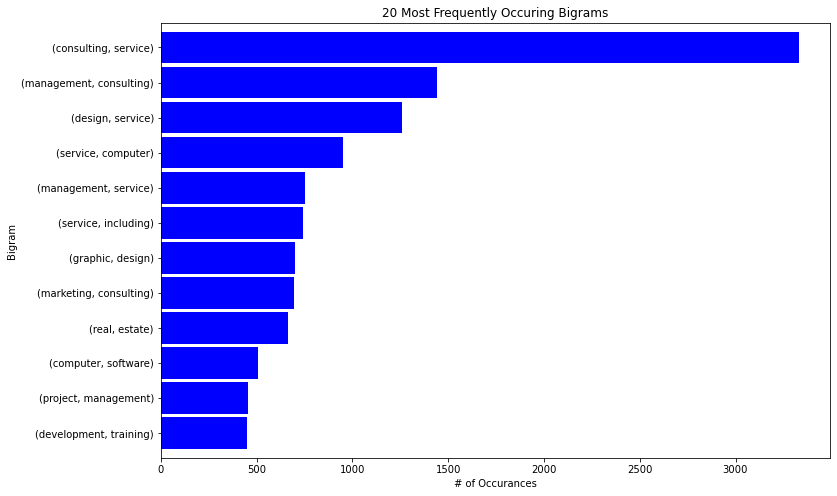

In [30]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

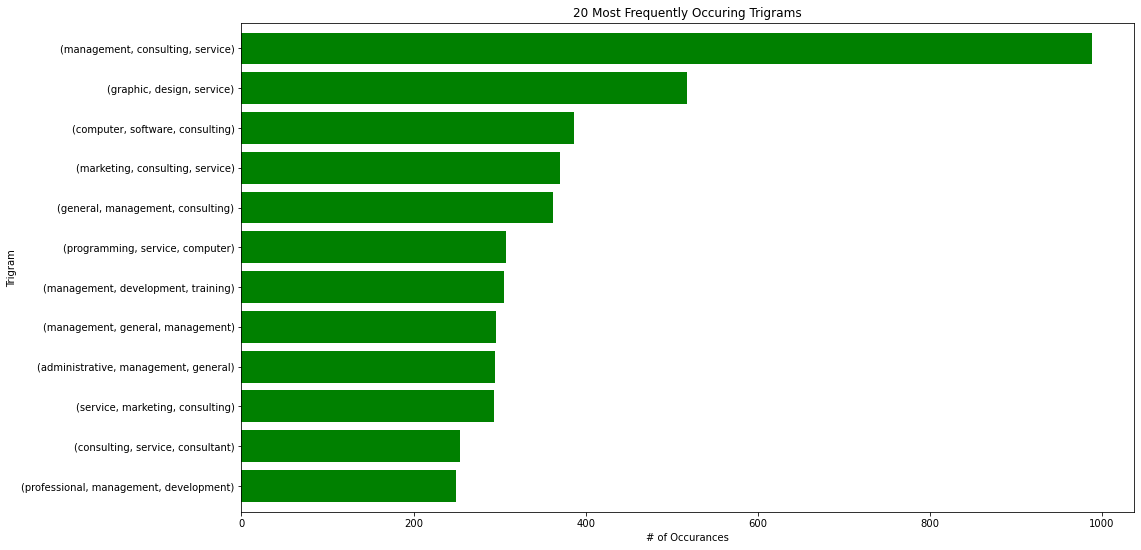

In [32]:
trigrams_series.sort_values().plot.barh(color='green', width=0.8, figsize=(16, 9))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [26]:
# nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Use
[nltk_data]     This\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [144]:
#!pip install -U spacy
#!python -m spacy download en_core_web_lg

In [90]:
import spacy
from collections import Counter
from string import punctuation
nlp = spacy.load("en_core_web_lg")
import en_core_web_lg
nlp = en_core_web_lg.load()

In [91]:
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] # 1
    doc = nlp(text.lower()) # 2
    for token in doc:
        # 3
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.text)
                
    return result # 5

In [33]:
output = get_hotwords(data[0])
print(output)

['services', 'buildings', 'dwellings', 'janitorial', 'services', 'carpet', 'upholstery', 'cleaning', 'services', 'reupholstery', 'furniture', 'repair', 'building', 'maintenance', 'installation', 'repair', 'services', 'air', 'duct', 'cleaning', 'services', 'carpet', 'dyeing', 'installation', 'repair', 'services', 'flooring', 'maintenance', 'repair', 'services', 'janitorial', 'custodial', 'services', 'window', 'washing', 'services', 'upholstery', 'drapery', 'maintenance', 'repair', 'building', 'maintenance', 'carpet', 'cleaning', 'services', 'duct', 'work', 'floor', 'janitorial', 'services', 'upholstery', 'cleaningon', 'customers', 'window', 'washing']


In [95]:
string = ''.join(gram_list[0])

In [97]:
print(get_hotwords(string))

['services', 'buildings', 'dwellingsjanitorial', 'servicescarpet', 'upholstery', 'cleaning', 'servicesreupholstery', 'furniture', 'maintenanceinstallation', 'repair', 'servicesair', 'duct', 'cleaning', 'servicescarpet', 'cleaningdyeinginstallation', 'maintenance', 'repairincluding', 'refinishing', 'servicesjanitorial', 'custodial', 'serviceswindow', 'servicesupholstery', 'drapery', 'maintenance', 'repairincluding', 'cleaning', 'maintenancecarpet', 'servicesduct', 'work', 'waxingjanitorial', 'servicesupholstery', 'cleaning(on', 'customers', 'premises)window']


In [35]:
from __future__ import print_function

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
!pip install gensim
import gensim
from gensim import corpora
import string
import argparse
import re

In [100]:
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += ele  
    
    # return string  
    return str1 

# Some funny code to test 
#!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
def get_ratio(row):
    name = capablitytest_split_words
    name1 = commoditytest_split_words
    return fuzz.token_set_ratio(name, name1)
#len(df[df.apply(get_ratio, axis=1) > 70]) / len(df)

In [1]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "paritoshk/toughleaf-nlp-dataresconstruction" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/paritoshk/toughleaf-nlp-dataresconstruction


'https://jovian.ai/paritoshk/toughleaf-nlp-dataresconstruction'

In [88]:
import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
#nltk.download()
# change this to read in your data


In [ ]:
finder = BigramCollocationFinder.from_words(
   nltk.corpus.genesis.words(data[0]))

# only bigrams that appear 3+ times
finder.apply_freq_filter(2) 

# return the 5 n-grams with the highest PMI
finder.nbest(bigram_measures.pmi, 10)

Ref =
https://pages.databricks.com/rs/094-YMS-629/images/HighPerformanceAI.pdf?_ga=2.188381544.1595966417.1633458238-1733421638.1633458238

https://github.com/paritoshk/pytextrank
BERT Sent trasnformers -https://github.com/paritoshk/sentence-transformers
https://aneesha.medium.com/beyond-bag-of-words-using-pytextrank-to-find-phrases-and-summarize-text-f736fa3773c5
    
    
    https://minimaxir.com/2019/09/howto-gpt2/

# Sentence Embeddings using Siamese BERT-Networks

In [ ]:
from sentence_transformers import SentenceTransformer

# Load the BERT model. Various models trained on Natural Language Inference (NLI) https://github.com/UKPLab/sentence-transformers/blob/master/docs/pretrained-models/nli-models.md and 
# Semantic Textual Similarity are available https://github.com/UKPLab/sentence-transformers/blob/master/docs/pretrained-models/sts-models.md

model = SentenceTransformer('bert-base-nli-mean-tokens')
# A corpus is a list with documents split by sentences.

sentences = data

# Each sentence is encoded as a 1-D vector with 78 columns
sentence_embeddings = model.encode(sentences)

print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))

print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])